# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [55]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
import warnings
warnings.filterwarnings('ignore')

font_title = {'family': 'times new roman', 
              'color': 'darkred', 
              'weight': 'bold', 
              'size': 14}

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# Ingest Data  

In [56]:
df = pd.read_excel ('World military power.xlsx')

In [57]:
df

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,Venezuela,260.0,Venezuela,38.0,Venezuela,0.0,Venezuela,52.0,...,Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800.0,Venezuela,7100.0,Venezuela,5267.0
135,Vietnam,0.3559,Vietnam,293.0,Vietnam,77.0,Vietnam,0.0,Vietnam,38.0,...,Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444.0,Vietnam,17702.0,Vietnam,4616.0
136,Yemen,1.2412,Yemen,169.0,Yemen,77.0,Yemen,0.0,Yemen,8.0,...,Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906.0,Yemen,0.0,Yemen,1601.0
137,Zambia,1.6464,Zambia,108.0,Zambia,18.0,Zambia,0.0,Zambia,11.0,...,Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250.0,Zambia,6043.0


# EDA

In [58]:
df

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,Venezuela,260.0,Venezuela,38.0,Venezuela,0.0,Venezuela,52.0,...,Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800.0,Venezuela,7100.0,Venezuela,5267.0
135,Vietnam,0.3559,Vietnam,293.0,Vietnam,77.0,Vietnam,0.0,Vietnam,38.0,...,Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444.0,Vietnam,17702.0,Vietnam,4616.0
136,Yemen,1.2412,Yemen,169.0,Yemen,77.0,Yemen,0.0,Yemen,8.0,...,Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906.0,Yemen,0.0,Yemen,1601.0
137,Zambia,1.6464,Zambia,108.0,Zambia,18.0,Zambia,0.0,Zambia,11.0,...,Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250.0,Zambia,6043.0


## Implement basic steps to see how is your data looks like

In [59]:
df.columns

Index(['2020 ranking', 'Unnamed: 1', 'Airforce Strength', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Land Strength',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Navy Strength', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Finances', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Logistics', 'Unnamed: 41',
       'Natural resources', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Manpower', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Geography', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55',
       'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59'],
  

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   2020 ranking       139 non-null    object
 1   Unnamed: 1         139 non-null    object
 2   Airforce Strength  139 non-null    object
 3   Unnamed: 3         139 non-null    object
 4   Unnamed: 4         139 non-null    object
 5   Unnamed: 5         139 non-null    object
 6   Unnamed: 6         139 non-null    object
 7   Unnamed: 7         139 non-null    object
 8   Unnamed: 8         139 non-null    object
 9   Unnamed: 9         139 non-null    object
 10  Unnamed: 10        139 non-null    object
 11  Unnamed: 11        139 non-null    object
 12  Unnamed: 12        139 non-null    object
 13  Unnamed: 13        139 non-null    object
 14  Unnamed: 14        139 non-null    object
 15  Unnamed: 15        139 non-null    object
 16  Land Strength      139 non-null    object
 1

In [61]:
df.describe().T

,count,unique,top,freq
2020 ranking,139,139,Military Strength,1
Unnamed: 1,139,139,Military Strength Power Index,1
Airforce Strength,139,139,Aircraft Strength,1
Unnamed: 3,139.0,114.0,19.0,5.0
Unnamed: 4,139,139,Fighter/Interceptor Strength,1
Unnamed: 5,139.0,64.0,0.0,46.0
Unnamed: 6,139,139,Attack Aircraft Strength,1
Unnamed: 7,139.0,39.0,0.0,75.0
Unnamed: 8,139,139,Transport Aircraft Fleet Strength,1
Unnamed: 9,139.0,50.0,0.0,15.0


## Detect and drop duplicated columns

In [62]:
drop_list = ['Airforce Strength', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 8', 'Unnamed: 10', 'Unnamed: 12', 'Unnamed: 14',
             'Land Strength', 'Unnamed: 18', 'Unnamed: 20', 'Unnamed: 22', 'Unnamed: 24', 'Navy Strength', 'Unnamed: 28', 
             'Unnamed: 30', 'Unnamed: 32', 'Unnamed: 34', 'Finances', 'Unnamed: 38', 'Logistics', 'Natural resources',
             'Unnamed: 44', 'Unnamed: 46', 'Manpower', 'Unnamed: 50', 'Geography', 'Unnamed: 54', 'Unnamed: 56', 'Unnamed: 58' ]

In [63]:
df.drop(drop_list, axis=1, inplace=True)

In [64]:
df

,2020 ranking,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,...,Unnamed: 41,Unnamed: 43,Unnamed: 45,Unnamed: 47,Unnamed: 49,Unnamed: 51,Unnamed: 53,Unnamed: 55,Unnamed: 57,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
2,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
3,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
4,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,...,444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
135,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,...,45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
136,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,...,57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0
137,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,...,88.0,0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",NaN,2250.0,6043.0


## Convert multi index columns to one level

In [65]:
list = df.loc[0].tolist()
list

['Military Strength',
 'Military Strength Power Index',
 'Aircraft Strength value',
 'Fighter/Interceptor Strength value',
 'Attack Aircraft Strength value',
 'Transport Aircraft Fleet Strength value',
 'Trainer Aircraft Fleet value',
 'Helicopter Fleet Strength value',
 'Attack Helicopter Fleet Strength value',
 'Tank Strength value',
 'AFV/APC Strength value',
 'Self-Propelled Artillery Strength value',
 'Towed Artillery Strength value',
 'Rocket Projector Strength value',
 'Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength value',
 'Destroyer Fleet Strength value',
 'Frigate Fleet Strength value',
 'defense spending budget value',
 'External Debt value',
 'Airport Totals value',
 'Oil Production value',
 'Oil Consumption value',
 'Proven Oil Reserves value',
 'Available Manpower value',
 'Total Population value',
 'Total Square Land Area value',
 'Total Coastline Coverage value',
 'Total Waterway Coverage value',
 'Total Border Coverag

In [66]:
df.set_axis(list, axis='columns', inplace=True) 

In [67]:
df

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
2,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
3,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
4,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,...,444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
135,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,...,45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
136,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,...,57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0
137,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,...,88.0,0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",NaN,2250.0,6043.0


In [68]:
df.drop(0, axis=0, inplace=True)

In [69]:
df.rename(columns = {'Military Strength':'Country'}, inplace=True)

In [70]:
df.reset_index(drop=True, inplace=True)

In [71]:
df

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,...,444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
134,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,...,45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
135,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,...,57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0
136,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,...,88.0,0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",NaN,2250.0,6043.0


In [72]:
#list_oil_con = df['Oil Consumption value'].tolist()

In [73]:
#list_oil_res = df['Proven Oil Reserves value'].tolist()

In [74]:
#list_tot_sqr = df['Total Square Land Area value'].tolist()

## Check for missing values 

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Country                                  138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength value                  138 non-null    object
 3   Fighter/Interceptor Strength value       138 non-null    object
 4   Attack Aircraft Strength value           138 non-null    object
 5   Transport Aircraft Fleet Strength value  138 non-null    object
 6   Trainer Aircraft Fleet value             138 non-null    object
 7   Helicopter Fleet Strength value          138 non-null    object
 8   Attack Helicopter Fleet Strength value   138 non-null    object
 9   Tank Strength value                      138 non-null    object
 10  AFV/APC Strength value                   138 non-null    objec

In [76]:
df.isnull().sum().sum()

144

In [77]:
df.duplicated().sum()

0

In [78]:
df.isnull().sum()*100/df.shape[0]

Country                                     0.000000
Military Strength Power Index               0.000000
Aircraft Strength value                     0.000000
Fighter/Interceptor Strength value          0.000000
Attack Aircraft Strength value              0.000000
Transport Aircraft Fleet Strength value     0.000000
Trainer Aircraft Fleet value                0.000000
Helicopter Fleet Strength value             0.000000
Attack Helicopter Fleet Strength value      0.000000
Tank Strength value                         0.000000
AFV/APC Strength value                      0.000000
Self-Propelled Artillery Strength value     0.000000
Towed Artillery Strength value              0.000000
Rocket Projector Strength value             0.000000
Navy Fleet Strengths value                 10.144928
Aircraft Carrier Fleet Strength value      16.666667
Submarine Fleet Strength value             16.666667
Destroyer Fleet Strength value             16.666667
Frigate Fleet Strength value               16.

In [79]:
df.apply(lambda x: x.nunique())

Country                                    138
Military Strength Power Index              138
Aircraft Strength value                    113
Fighter/Interceptor Strength value          63
Attack Aircraft Strength value              38
Transport Aircraft Fleet Strength value     49
Trainer Aircraft Fleet value                77
Helicopter Fleet Strength value             97
Attack Helicopter Fleet Strength value      45
Tank Strength value                        106
AFV/APC Strength value                     130
Self-Propelled Artillery Strength value     70
Towed Artillery Strength value              91
Rocket Projector Strength value             68
Navy Fleet Strengths value                  78
Aircraft Carrier Fleet Strength value        5
Submarine Fleet Strength value              20
Destroyer Fleet Strength value              11
Frigate Fleet Strength value                18
defense spending budget value              124
External Debt value                        138
Airport Total

In [80]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
Country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Military Strength Power Index,1.3444,2.3137,0.4659,0.8379,0.6521,2.1251,0.3225,0.9568,0.9463,1.8547,...,0.7034,0.1717,0.0606,1.8909,0.8086,0.6449,0.3559,1.2412,1.6464,1.7577
Aircraft Strength value,260.0,19.0,551.0,295.0,227.0,64.0,464.0,120.0,147.0,109.0,...,538.0,733.0,13264.0,50.0,185.0,260.0,293.0,169.0,108.0,90.0
Fighter/Interceptor Strength value,0.0,0.0,103.0,72.0,24.0,0.0,82.0,15.0,17.0,17.0,...,98.0,133.0,2085.0,0.0,66.0,38.0,77.0,77.0,18.0,10.0
Attack Aircraft Strength value,25.0,0.0,22.0,18.0,7.0,9.0,6.0,0.0,12.0,0.0,...,20.0,15.0,715.0,7.0,20.0,0.0,0.0,0.0,0.0,0.0
Transport Aircraft Fleet Strength value,30.0,0.0,59.0,30.0,9.0,3.0,38.0,11.0,1.0,2.0,...,40.0,44.0,945.0,9.0,18.0,52.0,38.0,8.0,11.0,14.0
Trainer Aircraft Fleet value,0.0,0.0,87.0,47.0,64.0,13.0,174.0,32.0,29.0,37.0,...,145.0,241.0,2643.0,16.0,2.0,82.0,36.0,21.0,52.0,38.0
Helicopter Fleet Strength value,187.0,19.0,257.0,126.0,100.0,37.0,133.0,62.0,88.0,65.0,...,229.0,312.0,5768.0,13.0,79.0,86.0,138.0,61.0,27.0,28.0
Attack Helicopter Fleet Strength value,0.0,0.0,45.0,15.0,0.0,20.0,22.0,0.0,17.0,22.0,...,30.0,49.0,967.0,0.0,25.0,10.0,25.0,14.0,0.0,6.0
Tank Strength value,0.0,0.0,880.0,379.0,370.0,110.0,59.0,56.0,570.0,180.0,...,434.0,227.0,6289.0,78.0,420.0,390.0,2615.0,620.0,75.0,42.0


In [81]:
#df['Oil Consumption value'].append(list_oil_con)

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [82]:
miss_val = []

[miss_val.append(column) for column in df.columns if any(df[column].isnull())]

print("Columns that have missing values :")

miss_val

Columns that have missing values :


['Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength value',
 'Destroyer Fleet Strength value',
 'Frigate Fleet Strength value',
 'Total Coastline Coverage value',
 'Total Border Coverage value']

In [83]:
df[df['Navy Fleet Strengths value'].isna()][['Country','Navy Fleet Strengths value']]

,Country,Navy Fleet Strengths value
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN
38,Ethiopia,NaN
48,Hungary,NaN
62,Kyrgyzstan,NaN
71,Mali,NaN
74,Moldova,NaN


Bu ülkelerin denize kıyısı yoktur ve Czechia( çok kısıtlı) haricinde deniz unsurları yoktur.

In [84]:
df['Navy Fleet Strengths value'] = df['Navy Fleet Strengths value'].fillna(0)

In [85]:
df[df['Aircraft Carrier Fleet Strength value'].isna()][['Country','Aircraft Carrier Fleet Strength value']]

,Country,Aircraft Carrier Fleet Strength value
5,Armenia,NaN
7,Austria,NaN
11,Belarus,NaN
13,Bhutan,NaN
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN
38,Ethiopia,NaN


bu ülkelerin hiçbirinin uçak gemisi yoktur.

In [86]:
df['Aircraft Carrier Fleet Strength value'] = df['Aircraft Carrier Fleet Strength value'].fillna(0)

In [87]:
df[df['Submarine Fleet Strength value'].isna()][['Country','Submarine Fleet Strength value']]

,Country,Submarine Fleet Strength value
5,Armenia,NaN
7,Austria,NaN
11,Belarus,NaN
13,Bhutan,NaN
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN
38,Ethiopia,NaN


Güney Kore ile Japonya denizaltı gücü seviyesinde eşitler. Diğer ülkelerin böyle bir gücü yok.

In [88]:
df[df['Country']=='Japan'][['Submarine Fleet Strength value']]

,Submarine Fleet Strength value
57,20.0


In [89]:
df[df['Country']=='South Korea'][['Submarine Fleet Strength value']].fillna(20)

,Submarine Fleet Strength value
110,20


In [90]:
df['Submarine Fleet Strength value'] = df['Submarine Fleet Strength value'].fillna(0)

In [91]:
df[df['Destroyer Fleet Strength value'].isna()][['Country','Destroyer Fleet Strength value']]

,Country,Destroyer Fleet Strength value
5,Armenia,NaN
7,Austria,NaN
11,Belarus,NaN
13,Bhutan,NaN
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN
38,Ethiopia,NaN


In [92]:
df[df['Country']=='Japan'][['Destroyer Fleet Strength value']]

,Destroyer Fleet Strength value
57,40.0


In [93]:
df[df['Country']=='South Korea'][['Destroyer Fleet Strength value']].fillna(40)

,Destroyer Fleet Strength value
110,40


In [94]:
df['Destroyer Fleet Strength value'] = df['Destroyer Fleet Strength value'].fillna(0)

In [95]:
df[df['Frigate Fleet Strength value'].isna()][['Country','Frigate Fleet Strength value']]

,Country,Frigate Fleet Strength value
5,Armenia,NaN
7,Austria,NaN
11,Belarus,NaN
13,Bhutan,NaN
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN
38,Ethiopia,NaN


Güney Kore ile Türkiye denizaltı gücü seviyesinde eşitler. Diğer ülkelerin böyle bir gücü yok.

In [96]:
df[df['Country']=='Turkey'][['Frigate Fleet Strength value']]

,Frigate Fleet Strength value
124,16.0


In [97]:
df[df['Country']=='South Korea'][['Frigate Fleet Strength value']].fillna(16)

,Frigate Fleet Strength value
110,16


In [98]:
df['Frigate Fleet Strength value'] = df['Frigate Fleet Strength value'].fillna(0)

In [99]:
df[df['Total Coastline Coverage value'].isna()][['Country','Total Coastline Coverage value']]

,Country,Total Coastline Coverage value
5,Armenia,NaN
7,Austria,NaN
11,Belarus,NaN
13,Bhutan,NaN
14,Bolivia,NaN
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN


Bu ülkelerin denize kıyısı yoktur.

In [100]:
df['Total Coastline Coverage value'] = df['Total Coastline Coverage value'].fillna(0)

In [101]:
df[df['Total Border Coverage value'].isna()][['Country','Total Border Coverage value']]

,Country,Total Border Coverage value
6,Australia,NaN
9,Bahrain,NaN
57,Japan,NaN
69,Madagascar,NaN
83,New Zealand,NaN
95,Philippines,NaN
105,Singapore,NaN
113,Sri Lanka,NaN
119,Taiwan,NaN


Bu ülkelerin hepsi ada ülkesi olduğu için kara sınırı yoktur.

In [102]:
df['Total Border Coverage value'] = df['Total Border Coverage value'].fillna(0)

In [103]:
df.isnull().sum().sum()

0

In [104]:
df.isna().sum()

Country                                    0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

## Fix the dtypes

In [105]:
df = df.apply(lambda x : x.astype('str').str.replace(',',''))

In [106]:
df = df.iloc[:,1:].astype('float64')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value  138 non-n

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [108]:
drop_cols = ["External Debt value", "Oil Production value", "Oil Consumption value", 
             "Proven Oil Reserves value", "Total Square Land Area value", "Total Coastline Coverage value",
             "Total Waterway Coverage value", "Total Border Coverage value"]

In [109]:
df.drop(drop_cols, axis=1, inplace=True)

In [110]:
df.columns

Index(['Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'Airport Totals value', 'Available Manpower value',
       'Total Population value'],
      dtype='object')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value  138 non-n

## Visualy inspect the some features

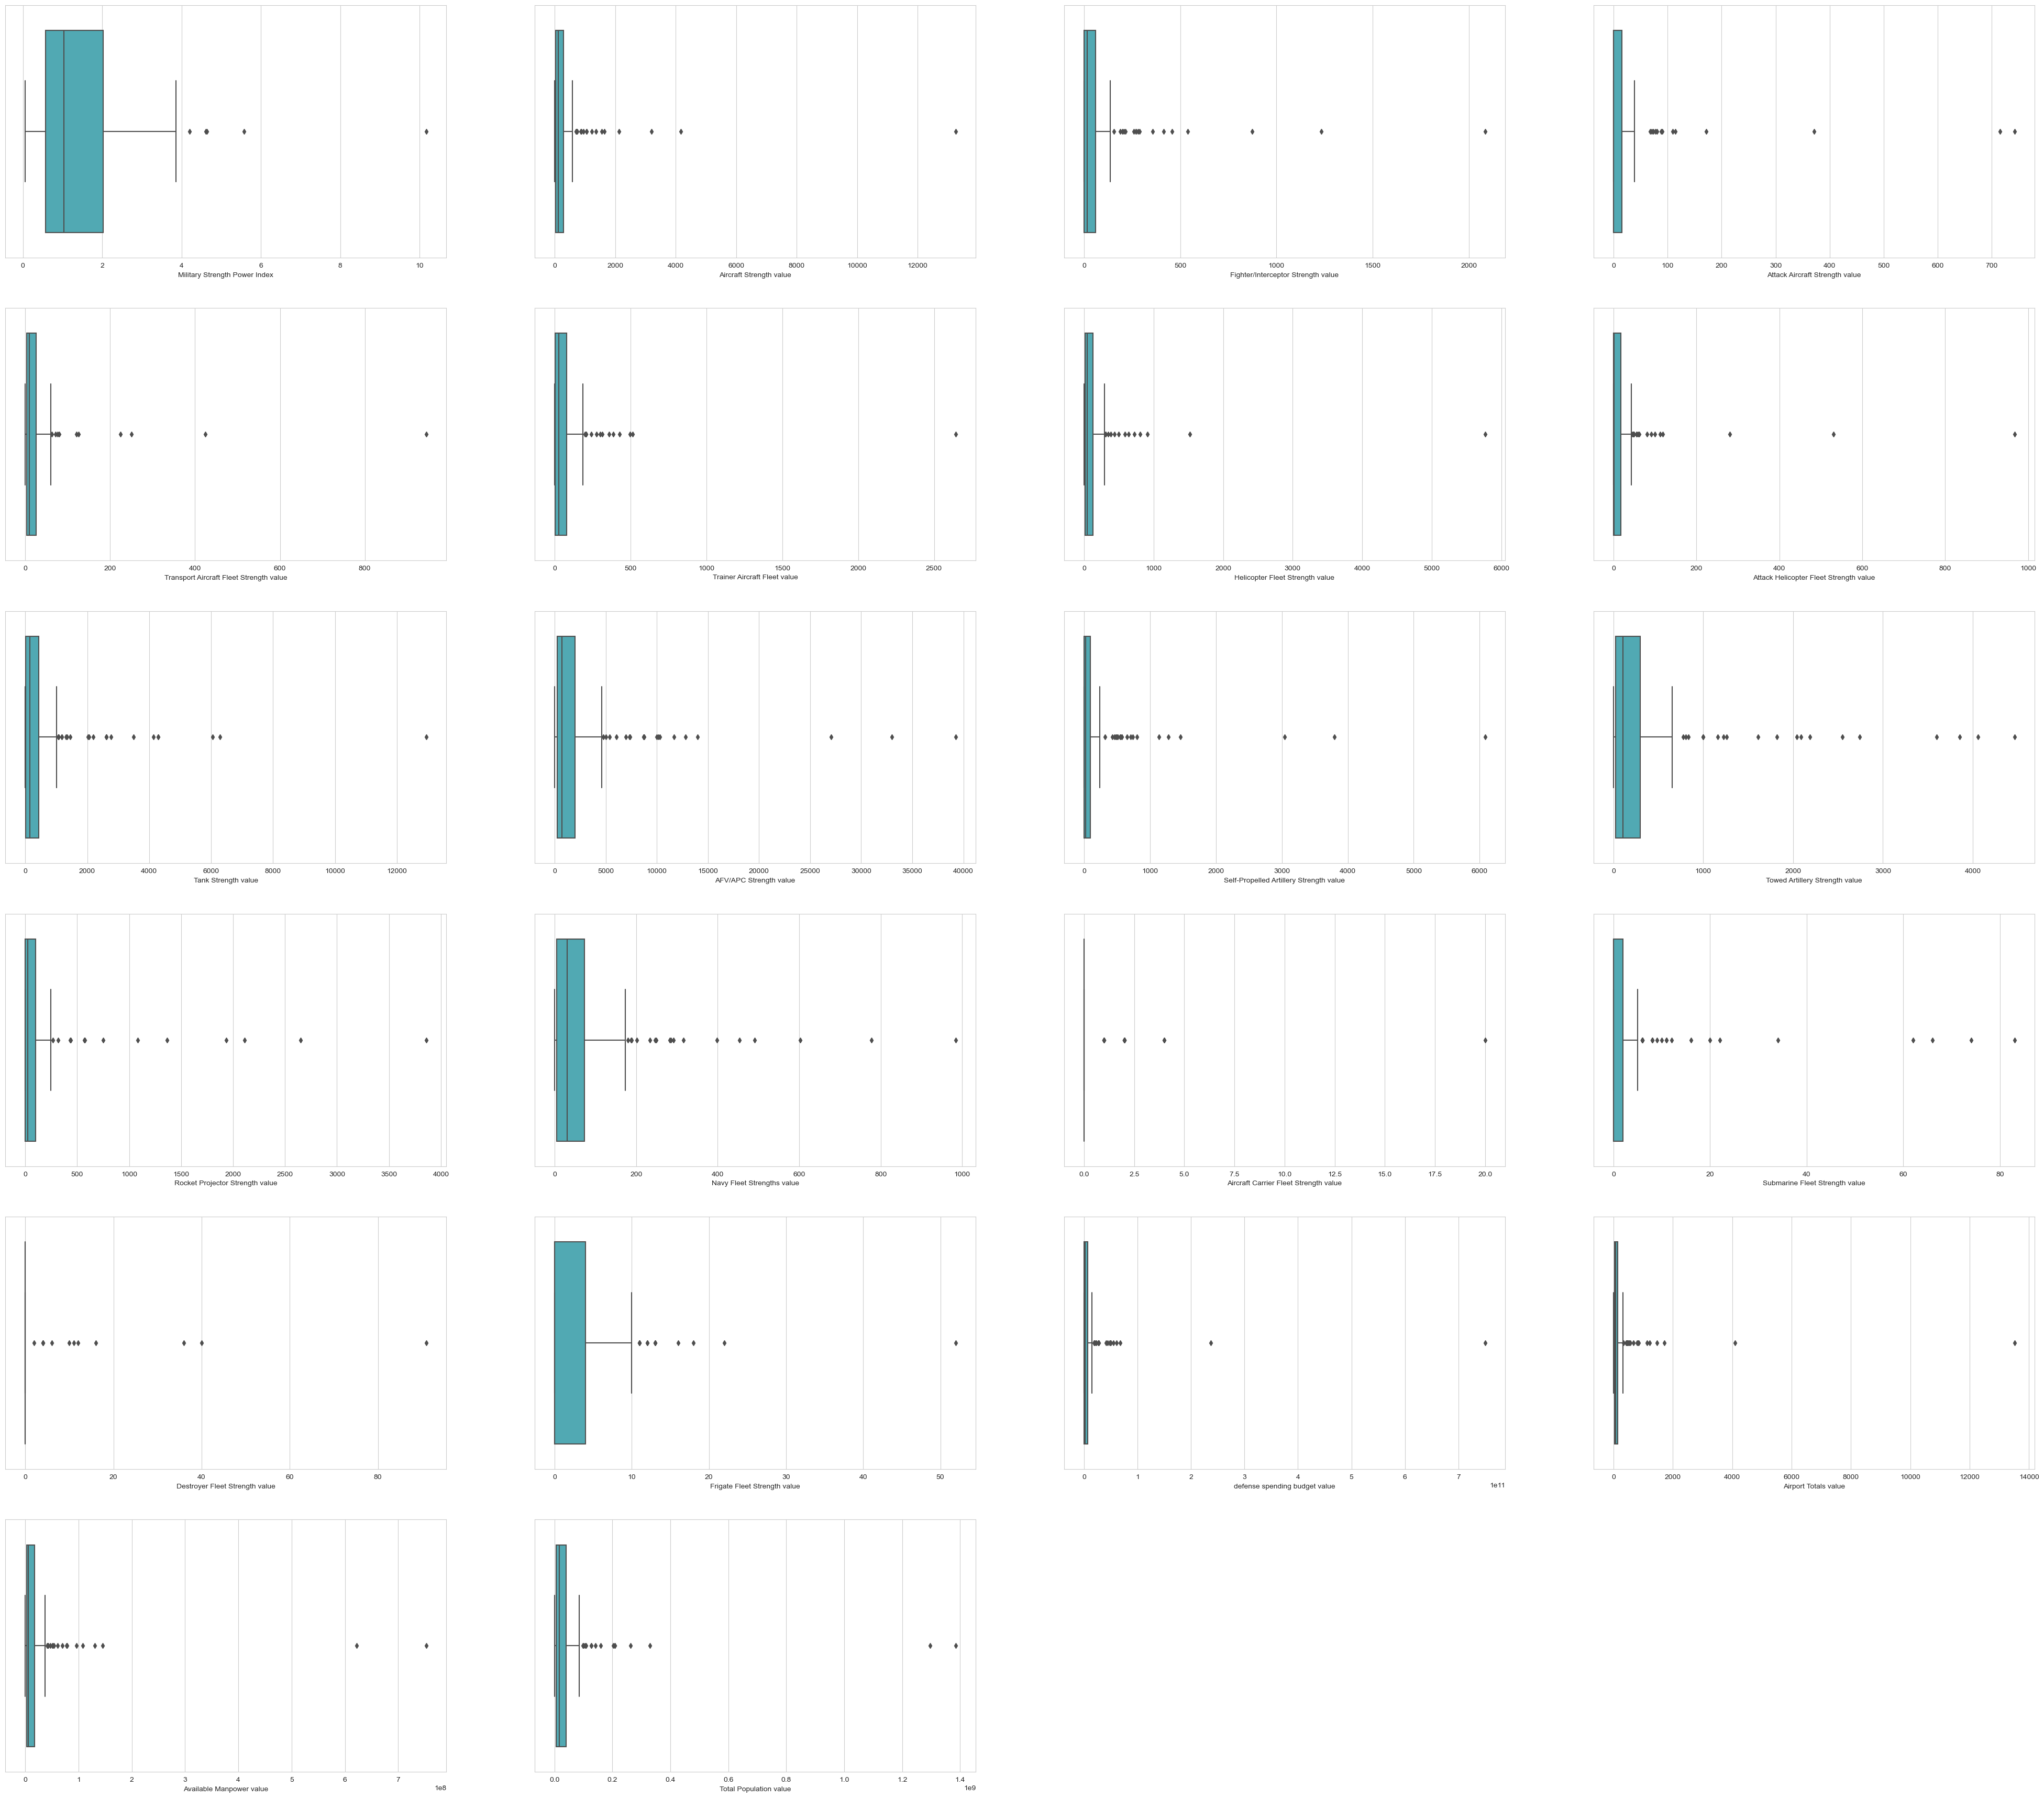

In [112]:
index = 0
plt.figure(figsize=(50,60))
for feature in df.columns:
    if feature != 'Country':
        index += 1
        plt.subplot(8,4,index)
        sns.boxplot(x=feature, data=df, palette="YlGnBu")

(22.5, -0.5)

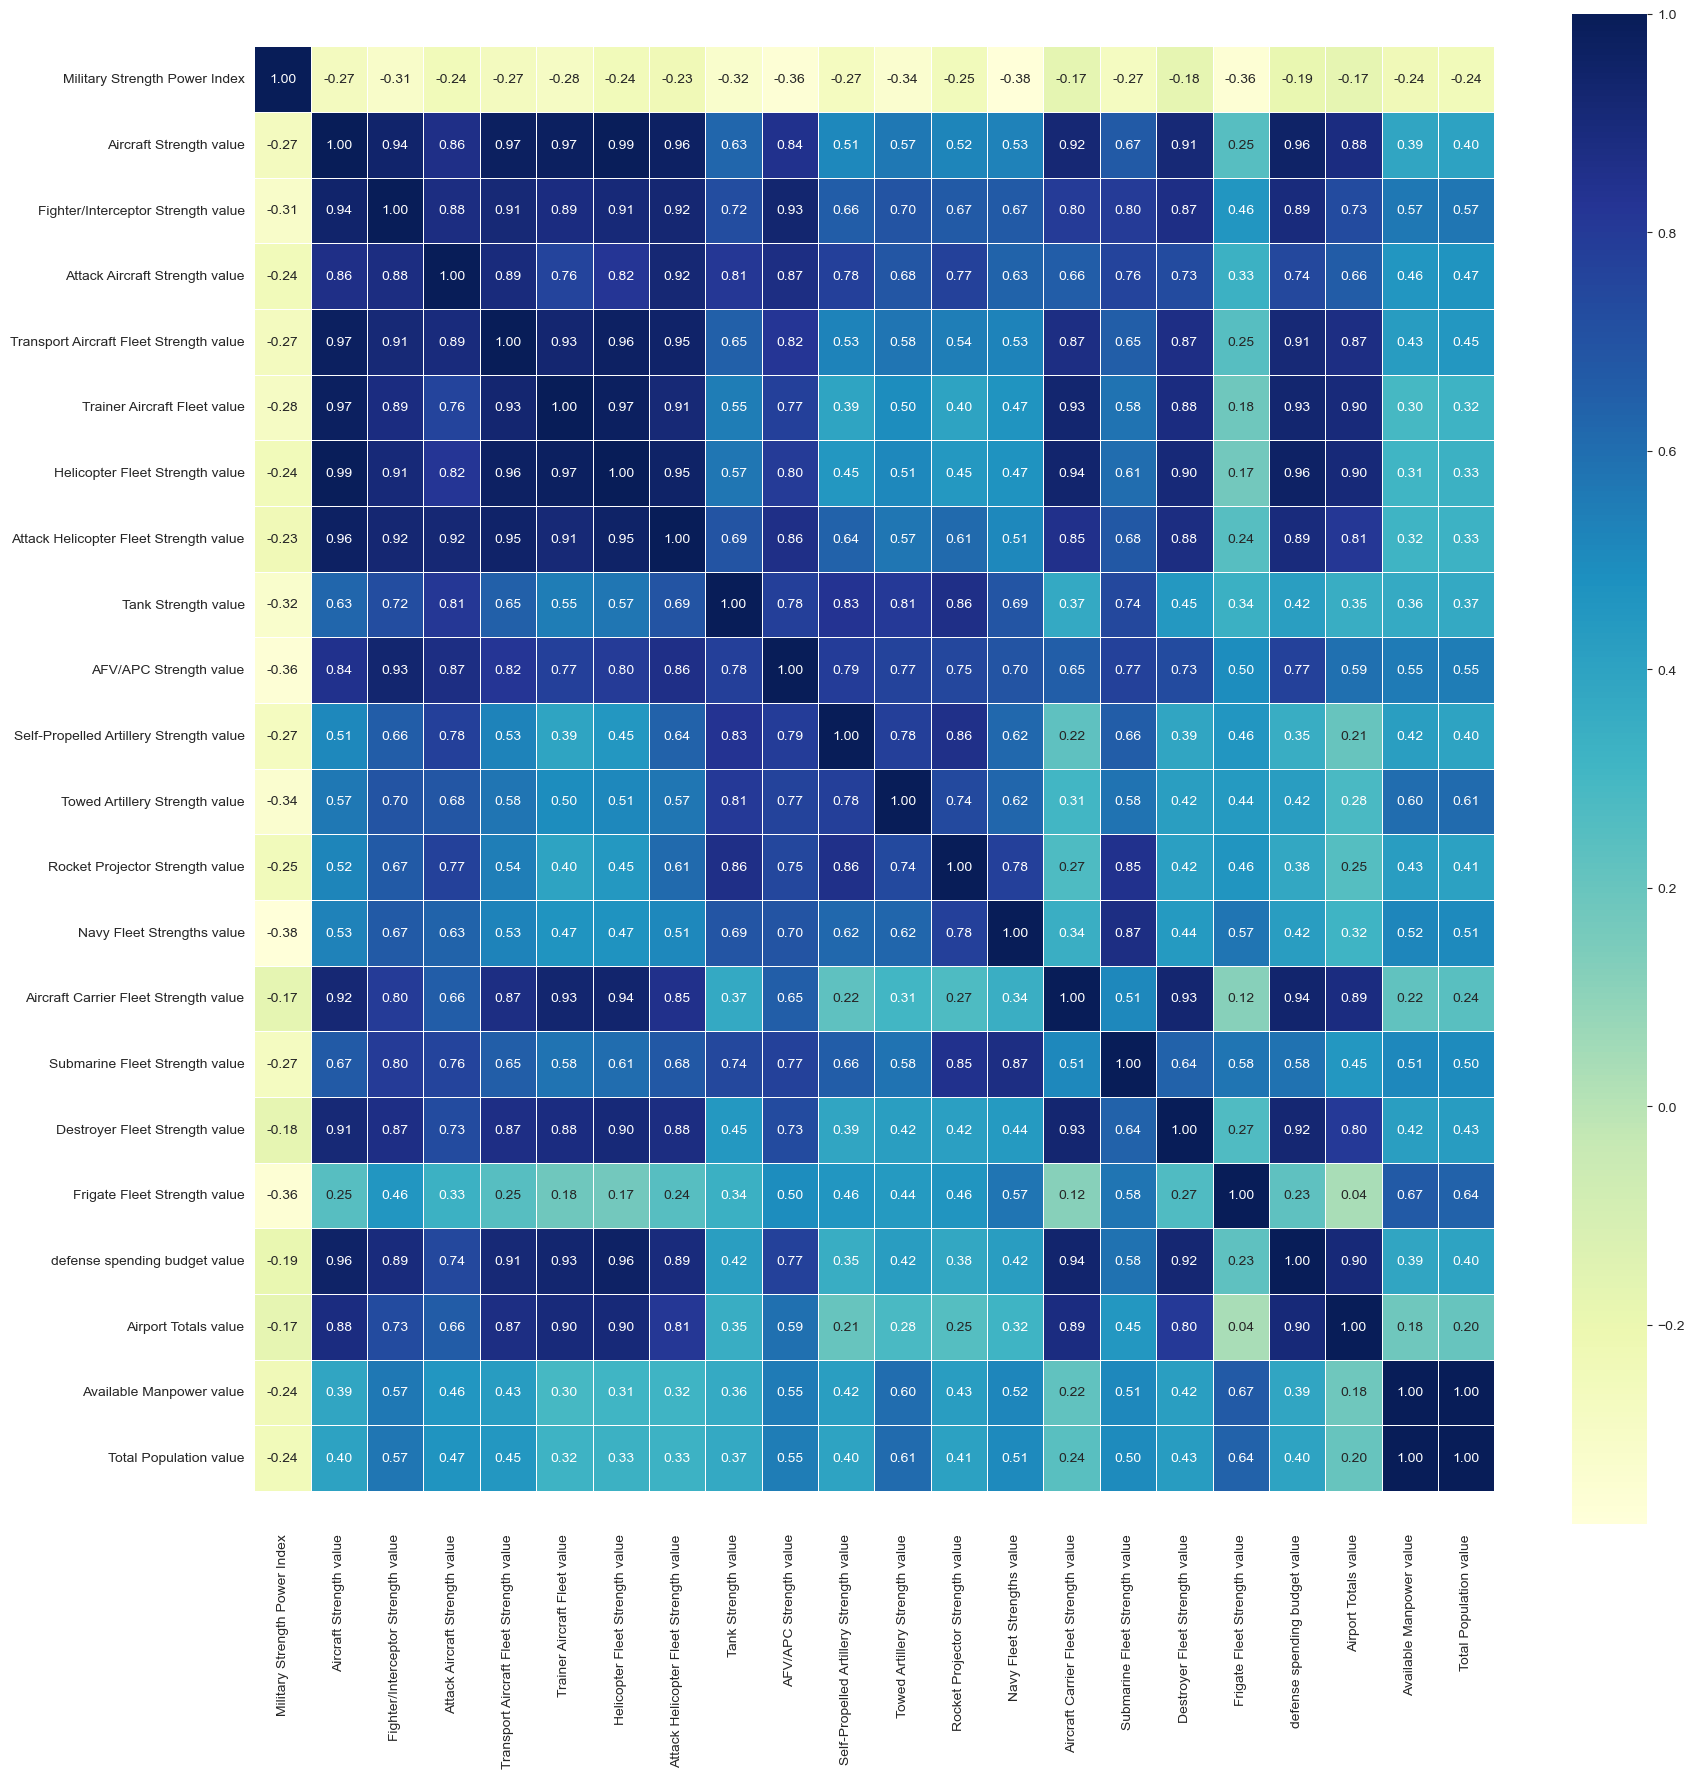

In [113]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

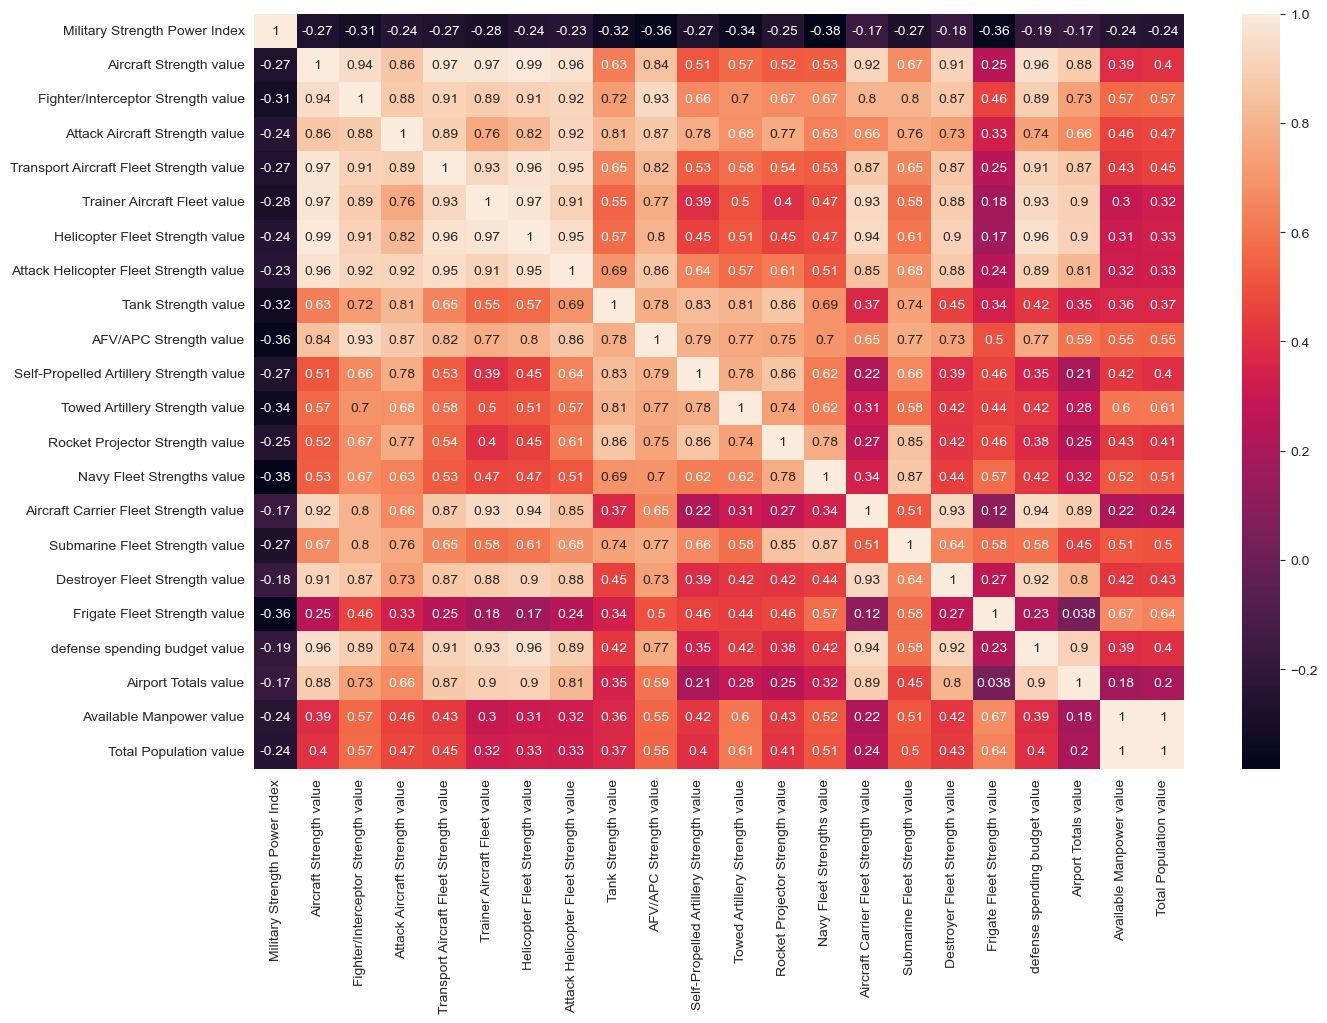

In [116]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True);

## Decriptive statistics

In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.0,1.460716e+00,1.324018e+00,6.060000e-02,5.748000e-01,1.034100e+00,2.021525e+00,1.016810e+01
Aircraft Strength value,138.0,3.884710e+02,1.231982e+03,0.000000e+00,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
Fighter/Interceptor Strength value,138.0,8.156522e+01,2.303248e+02,0.000000e+00,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
Attack Aircraft Strength value,138.0,2.576087e+01,9.452822e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
Transport Aircraft Fleet Strength value,138.0,3.023188e+01,9.233044e+01,0.000000e+00,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
Trainer Aircraft Fleet value,138.0,8.283333e+01,2.408037e+02,0.000000e+00,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
Helicopter Fleet Strength value,138.0,1.540652e+02,5.201836e+02,0.000000e+00,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
Attack Helicopter Fleet Strength value,138.0,2.562319e+01,9.732609e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
Tank Strength value,138.0,6.465652e+02,1.515464e+03,0.000000e+00,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
AFV/APC Strength value,138.0,2.485696e+03,5.410546e+03,0.000000e+00,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04


(50000000.0, 400000000.0)

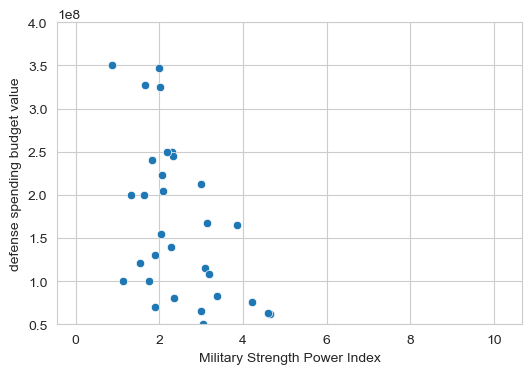

In [119]:
sns.scatterplot(data=df, x="Military Strength Power Index", y="defense spending budget value")
plt.ylim(50000000,400000000)

# Data Preprocessing

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pyclustertend import hopkins

# Modelling

In [120]:
X = df

In [121]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [123]:
hopkins(X_scaled, X_scaled.shape[0])

0.07095398540090284

## Clustering with K-means

In [141]:
ssd = [] #sum squared distance to centroid

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

In [142]:
ssd

[7.507724748469112e+22,
 2.2534595403844866e+22,
 4.942042136603341e+21,
 1.7855653995933212e+21,
 1.0314570551615505e+21,
 6.241291202137774e+20,
 3.5981545831414596e+20,
 2.7988142225542617e+20]

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

Text(0.5, 1.0, 'elbow method')

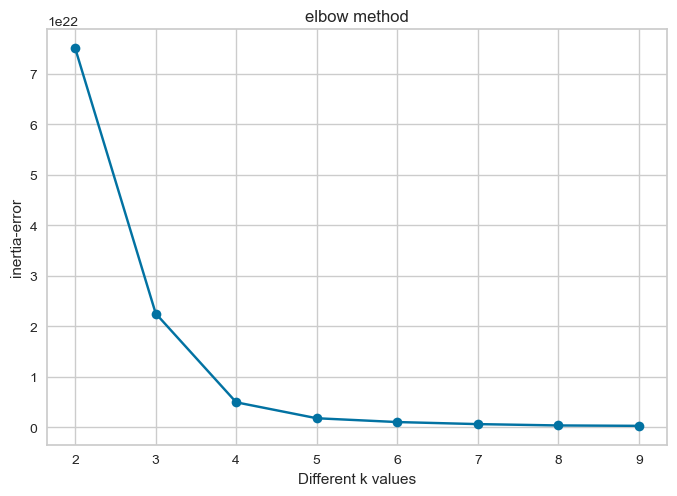

In [143]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

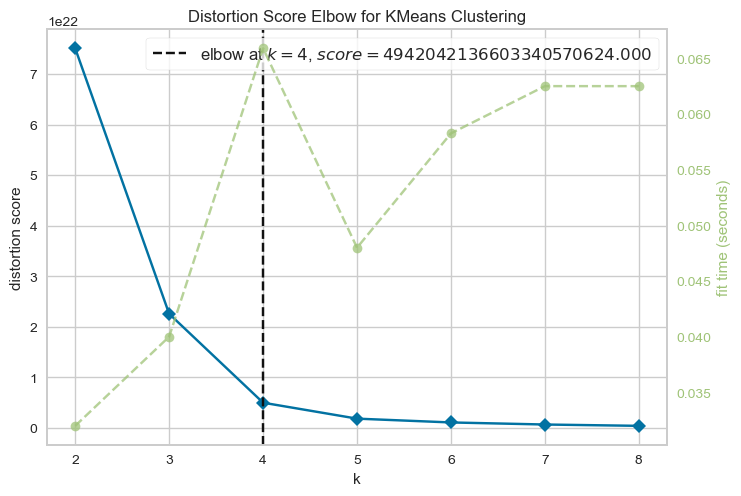

In [140]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

In [144]:
from sklearn.metrics import silhouette_score

In [146]:
silhouette_score(X, K_means_model.labels_)

NameError: name 'K_means_model' is not defined

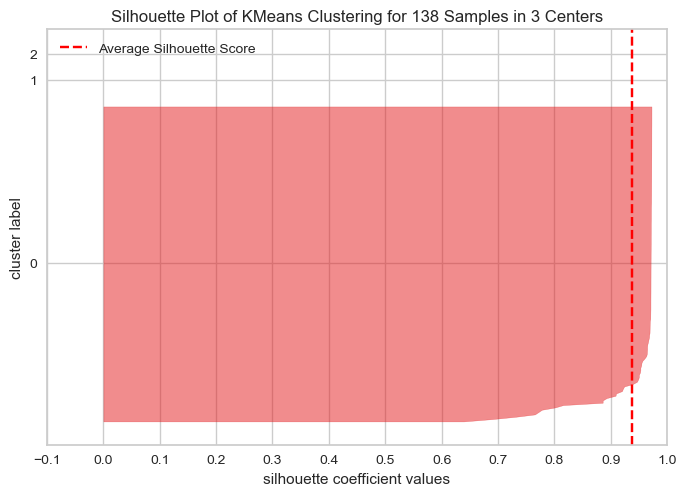

In [147]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

### Model Building and label visualisation

In [148]:
model = KMeans(n_clusters=4, random_state=42)
model.fit_predict(X)

array([3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3,
       3, 3, 3, 3, 3, 3])

In [149]:
model.labels_

array([3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3,
       3, 3, 3, 3, 3, 3])

In [150]:
df['cluster']=model.labels_

In [ ]:
df[df['cluster']==0]['Country']

In [ ]:
df[df['cluster']==1]['Country']

In [ ]:
df[df['cluster']==2]['Country']

In [ ]:
df[df['cluster']==3]['Country']

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster)
plt.show();

### Evaluate 

## Hierarchical Clustering

### Dendogram

### Model Building and label visualisation

### Evaluate 